In [12]:
import sys
sys.path.insert(0, '../scripts')

import meals as ml
import tools as tl
import paths
from preprocessing import read_csv_clean
import intervals as invs

collect_quantile = 0.75
pellet_quantile = 0.75
time_threshold = 90
pellet_threshold = 3

[46.15384615384615, 62.5, 100.0, 100.0, 81.81818181818183]


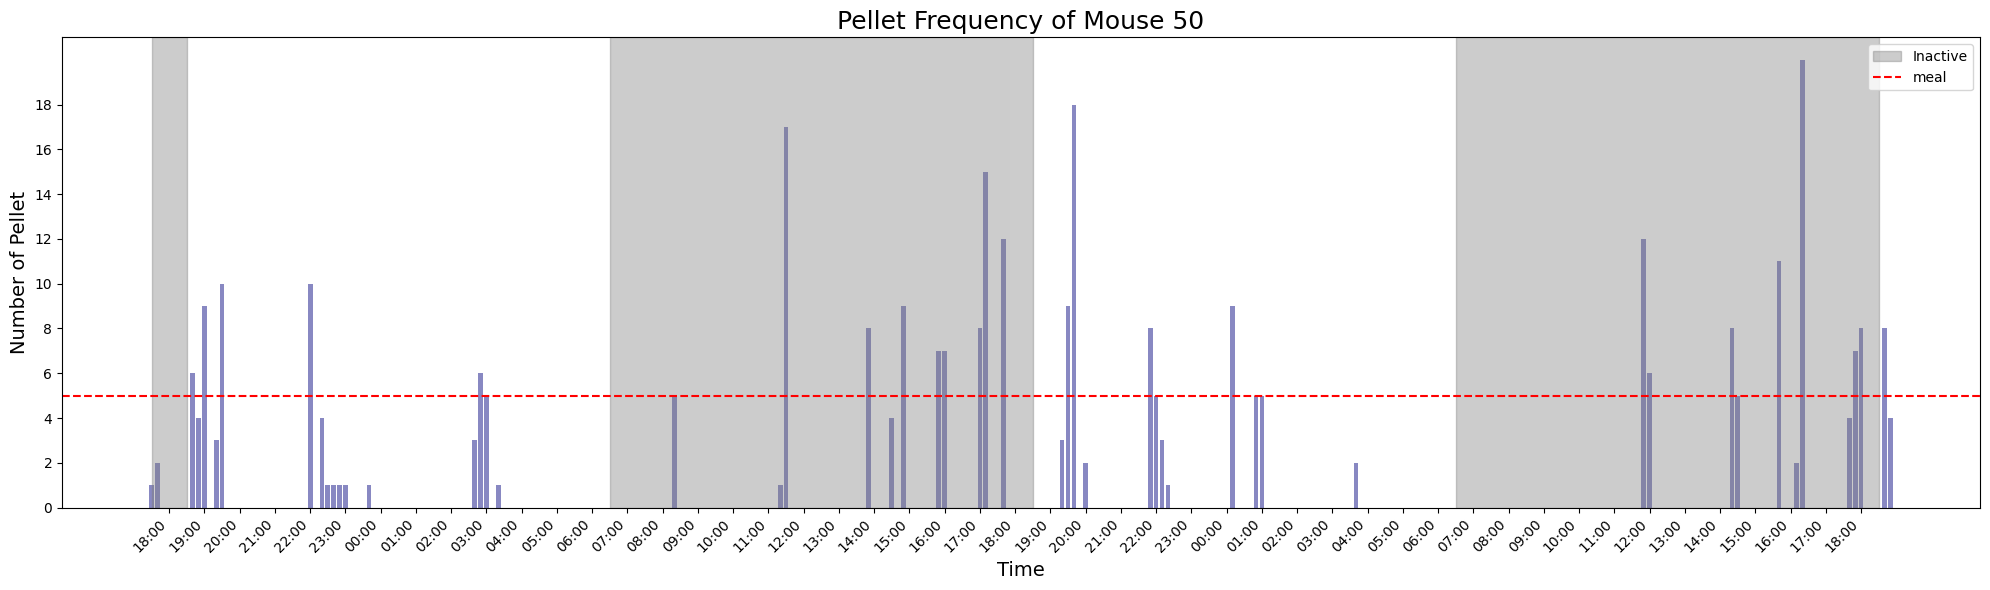

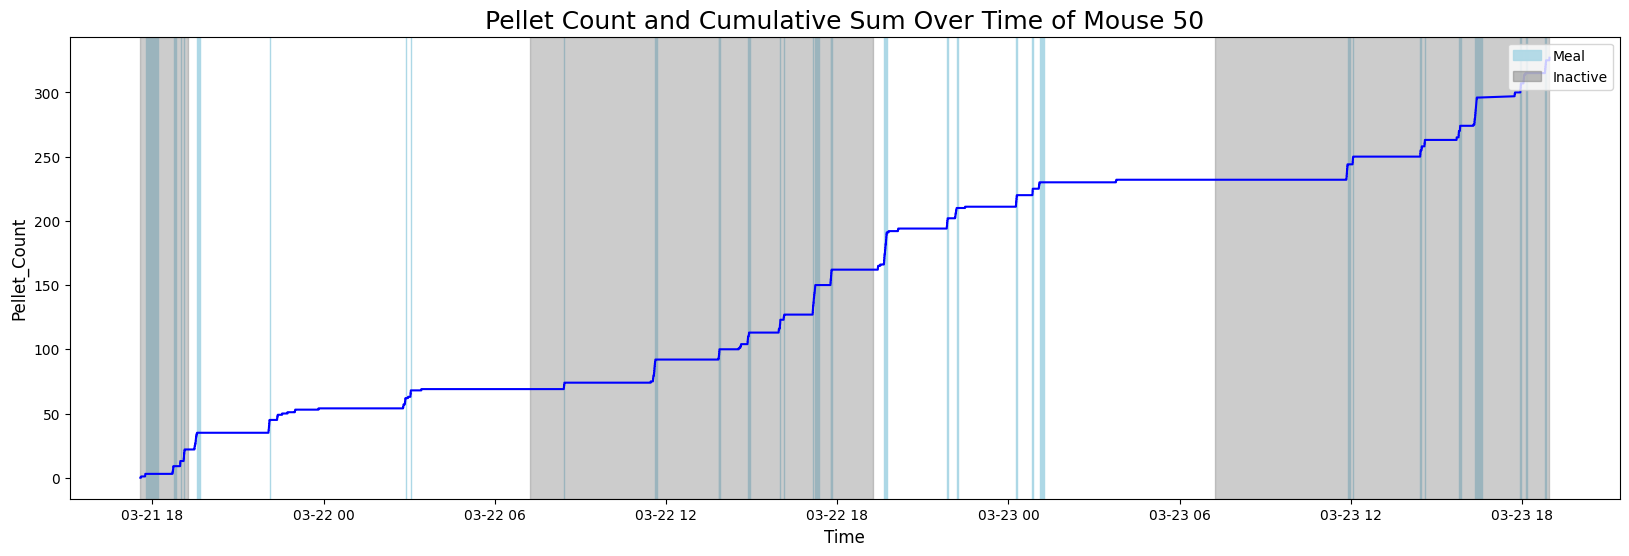

[60.0, 35.714285714285715, 100.0, 70.0, 71.42857142857143]


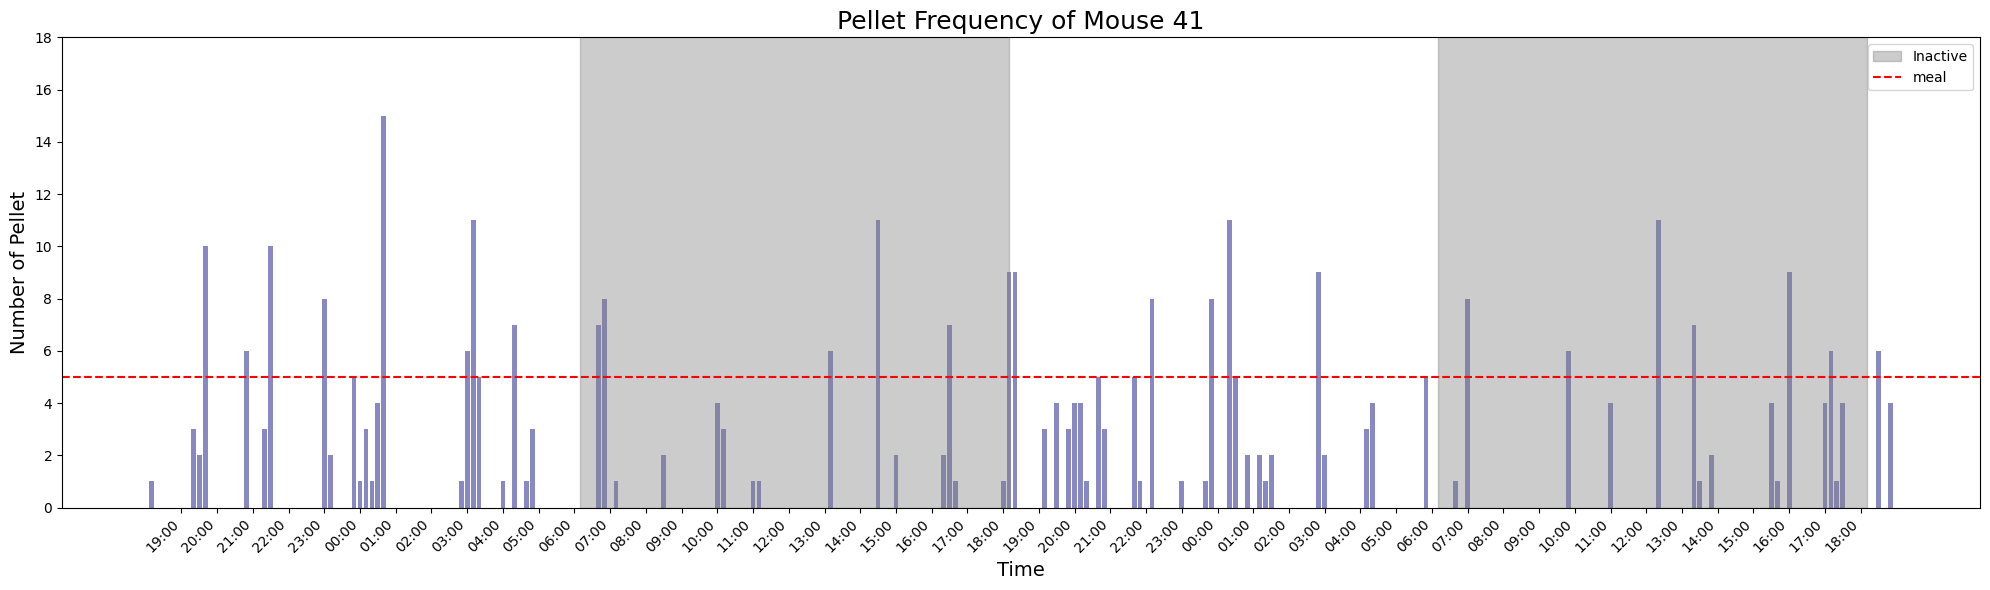

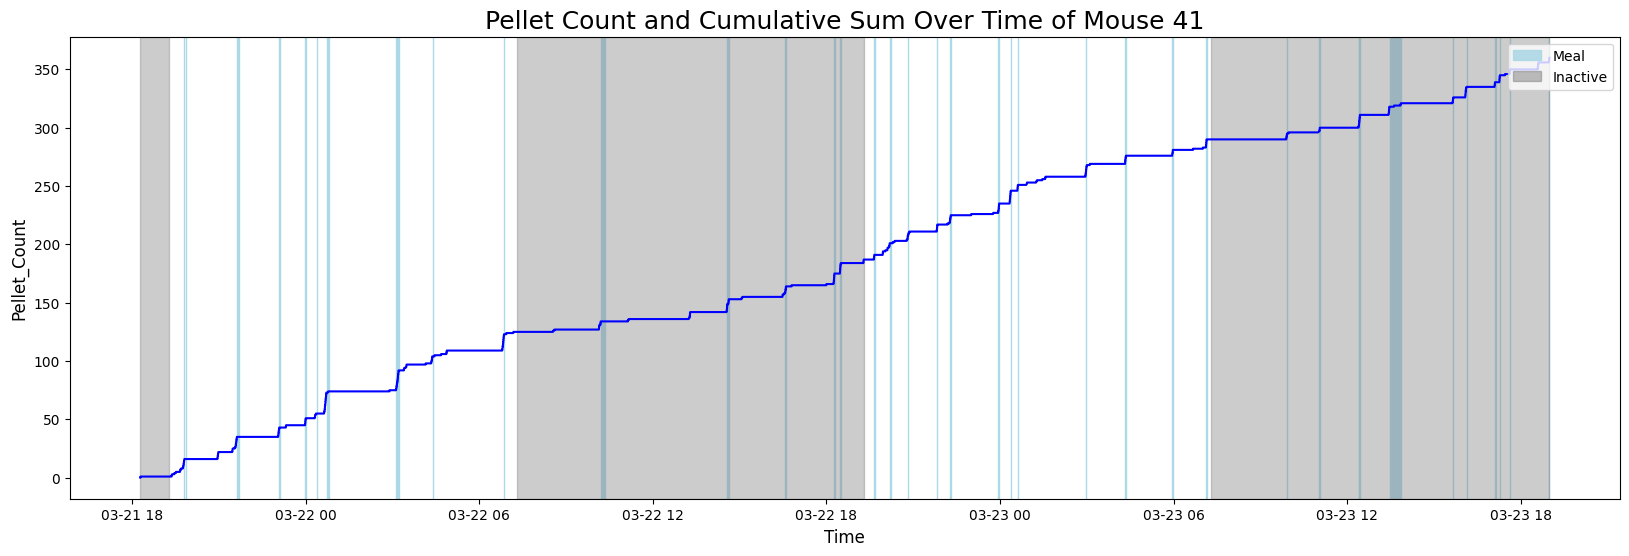

[64.70588235294117, 100.0, 100.0, 77.77777777777779, 40.0]


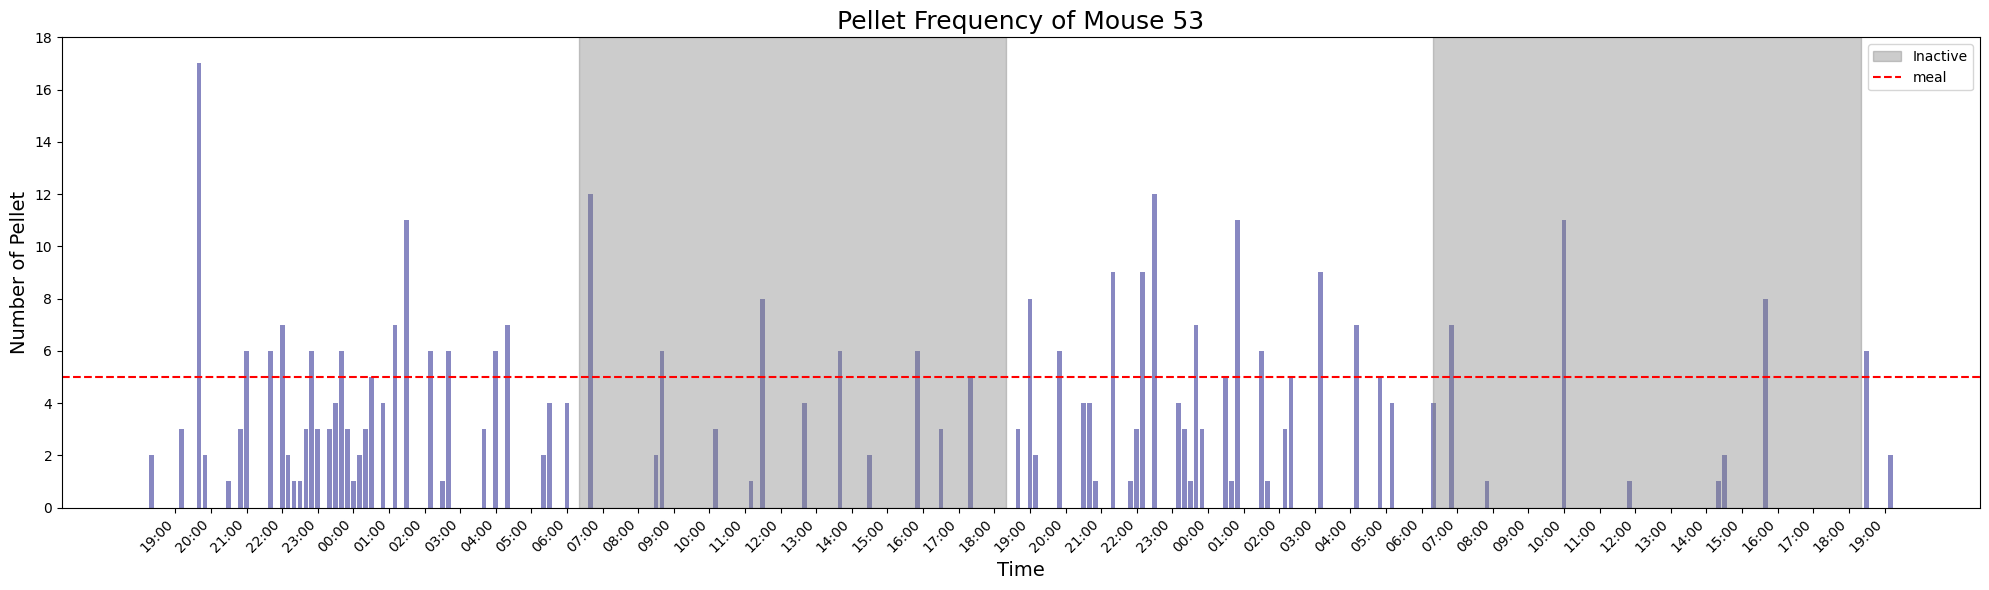

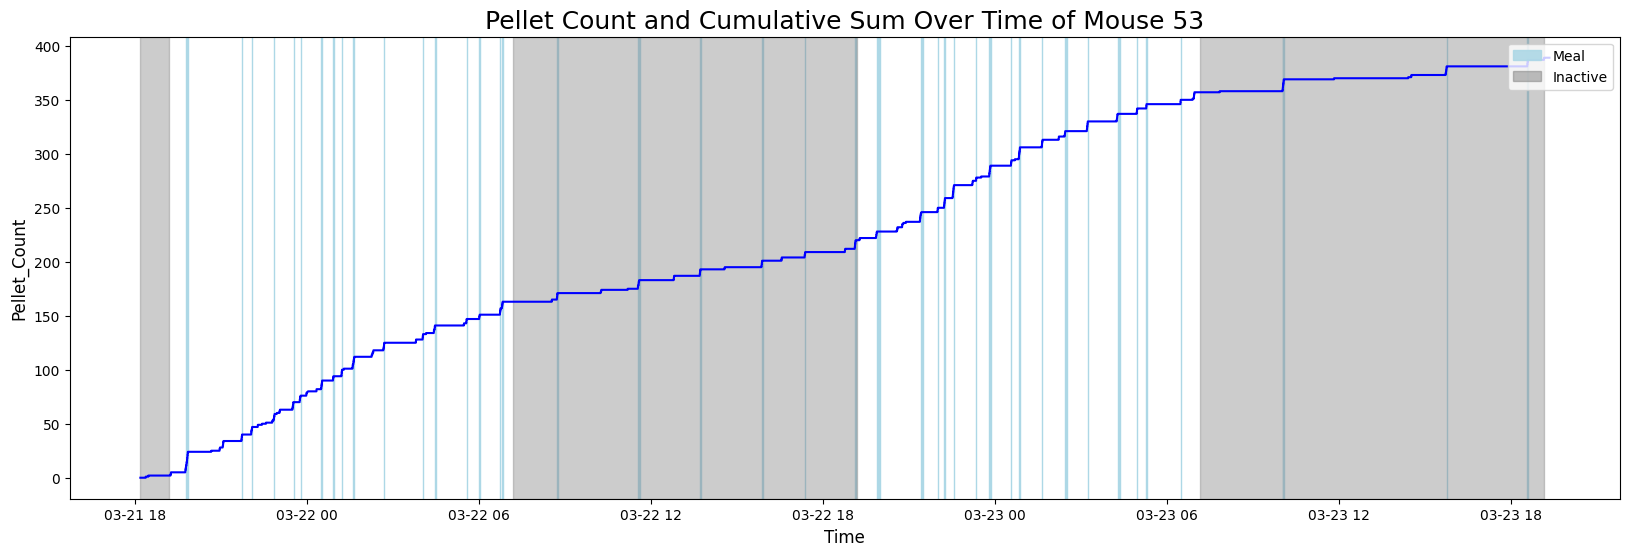

[100.0, 100.0, 100.0, 100.0, 89.47368421052632]


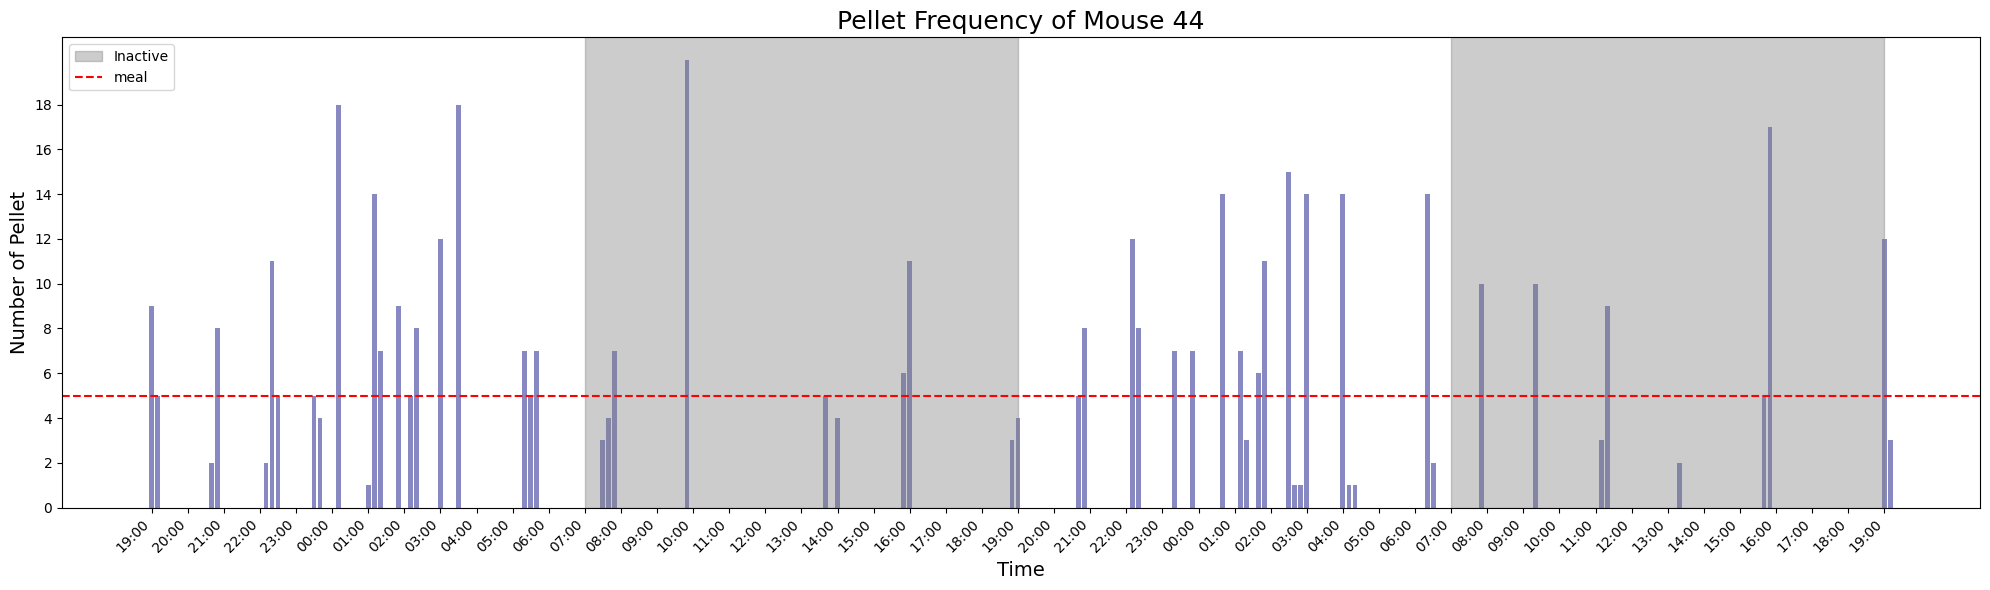

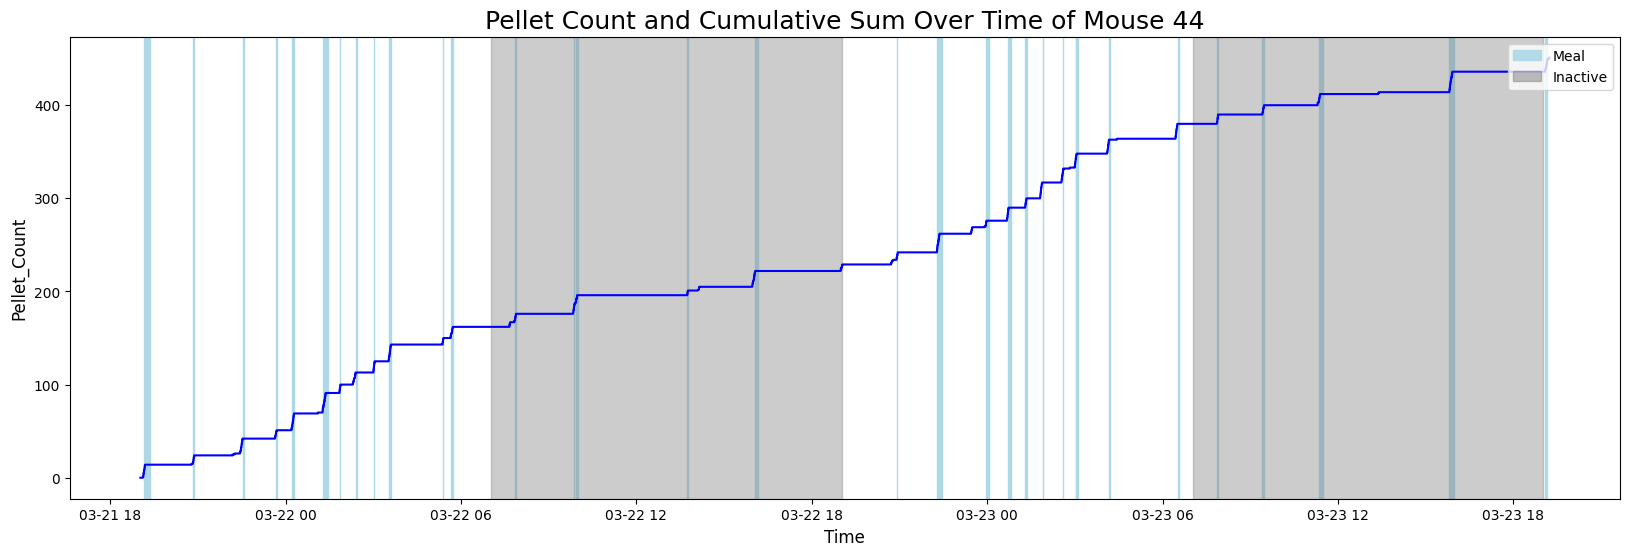

[22.22222222222222, 58.82352941176471, 64.70588235294117, 66.66666666666666, 100.0]


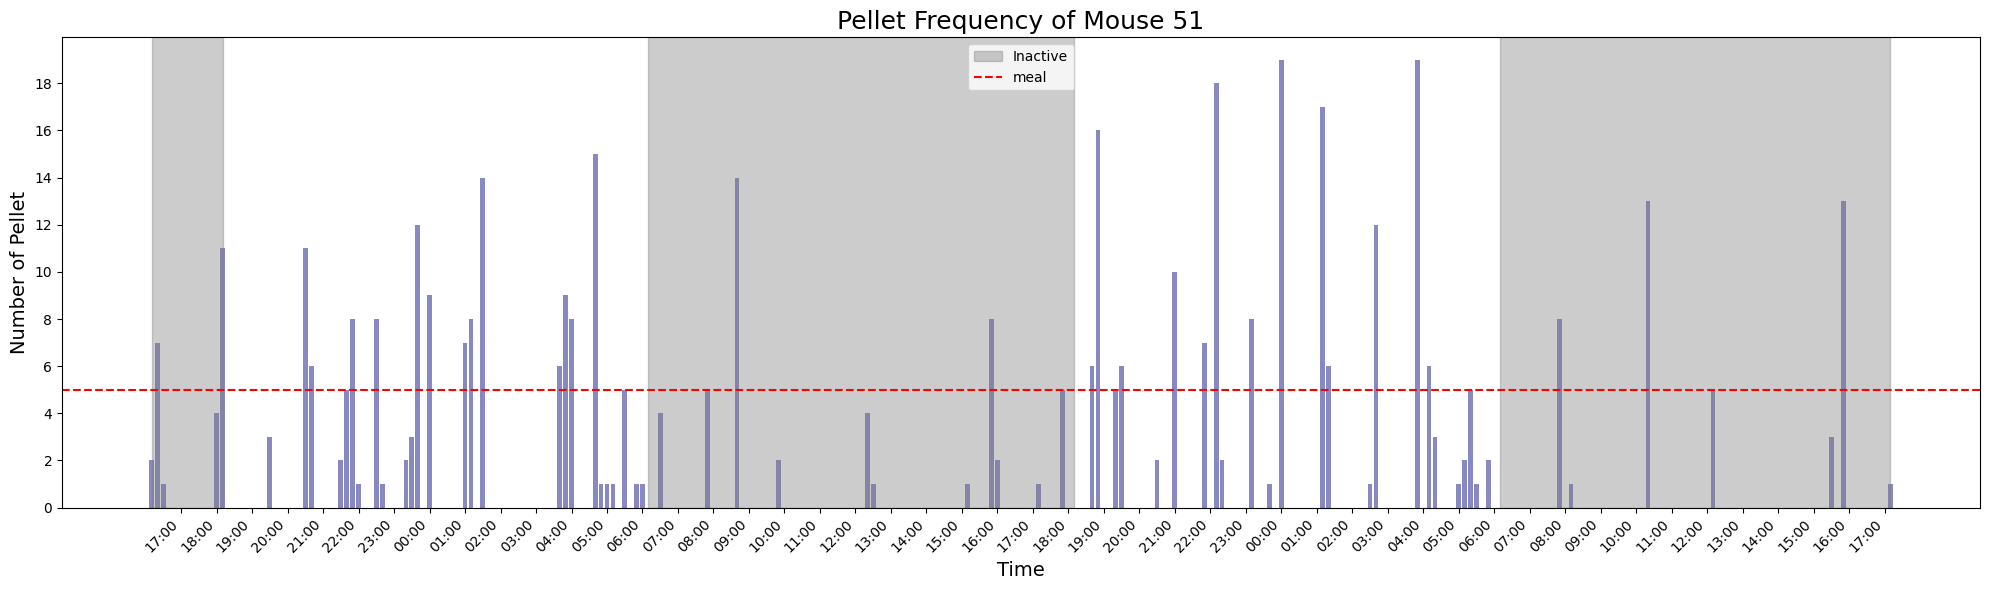

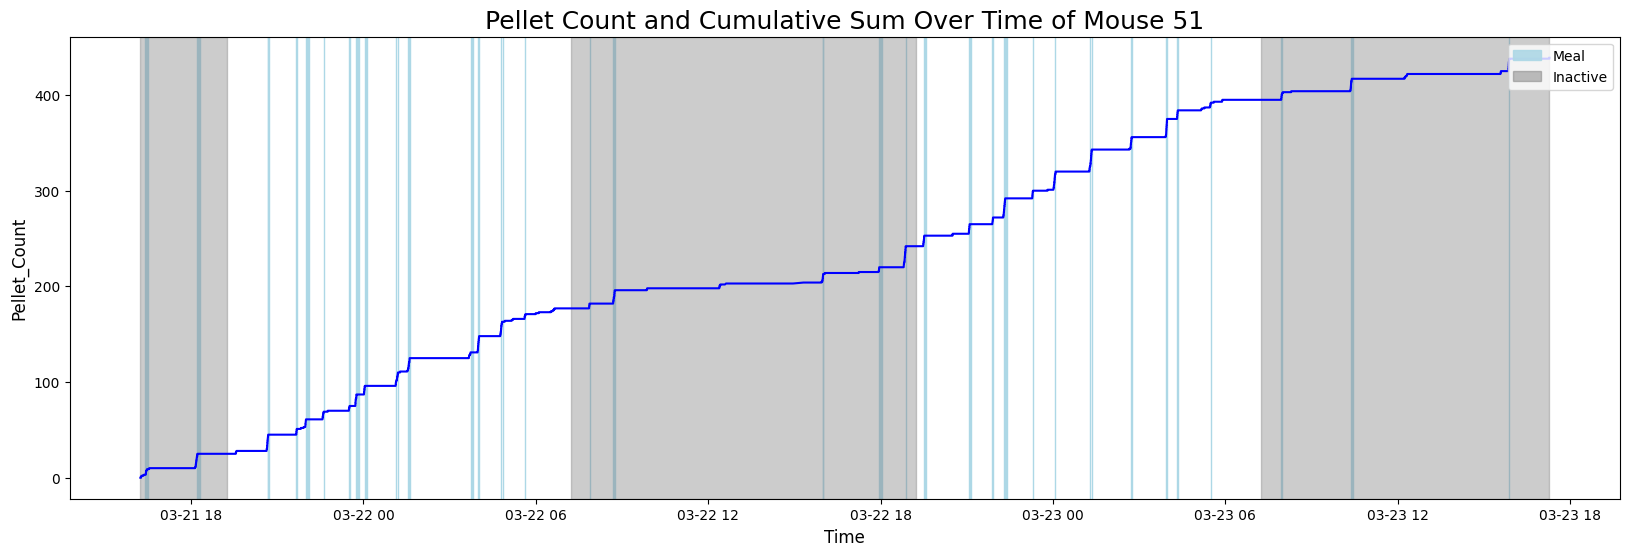

[100.0, 100.0, 100.0, 73.91304347826086, 71.42857142857143]


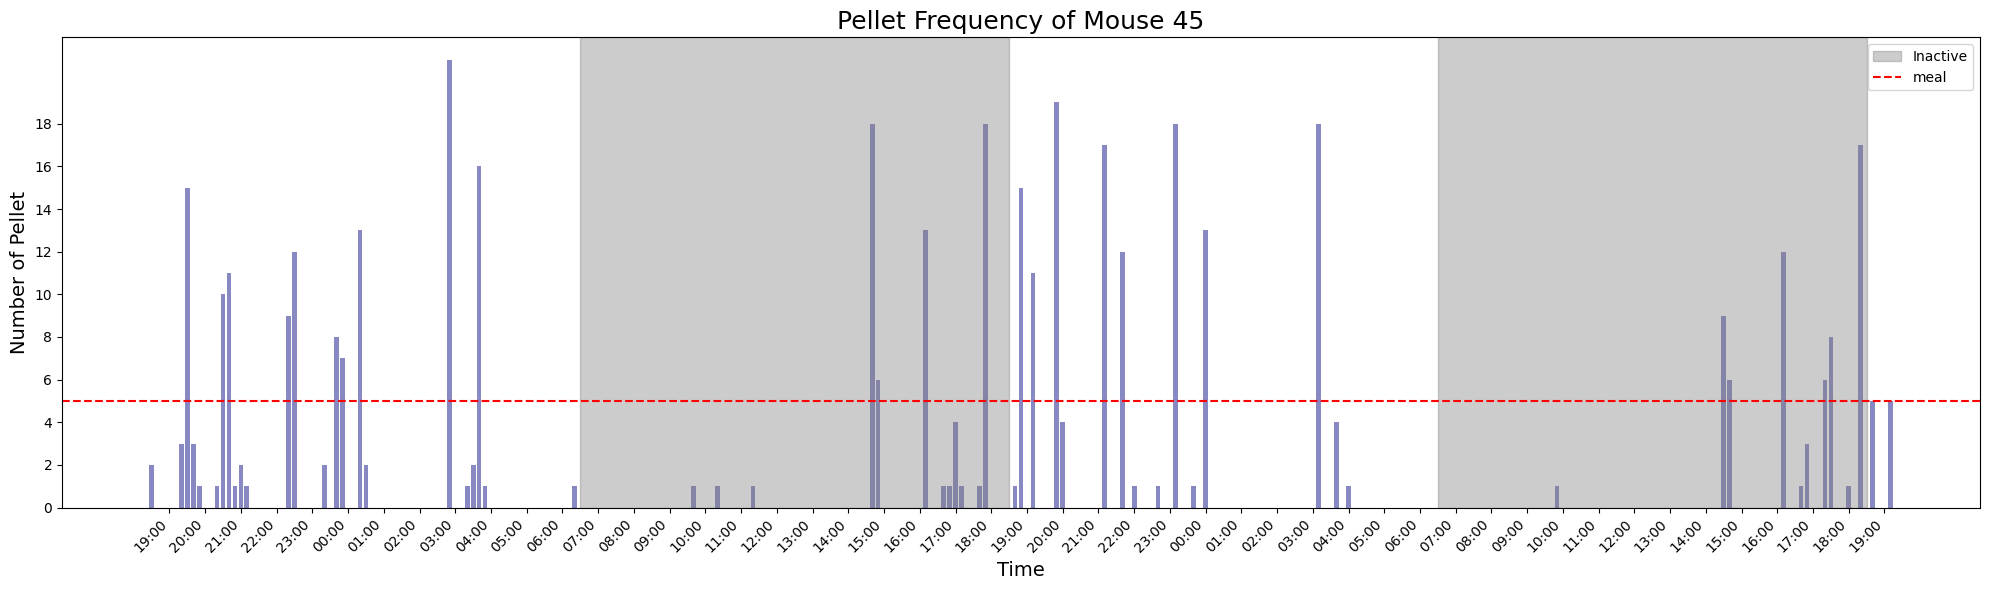

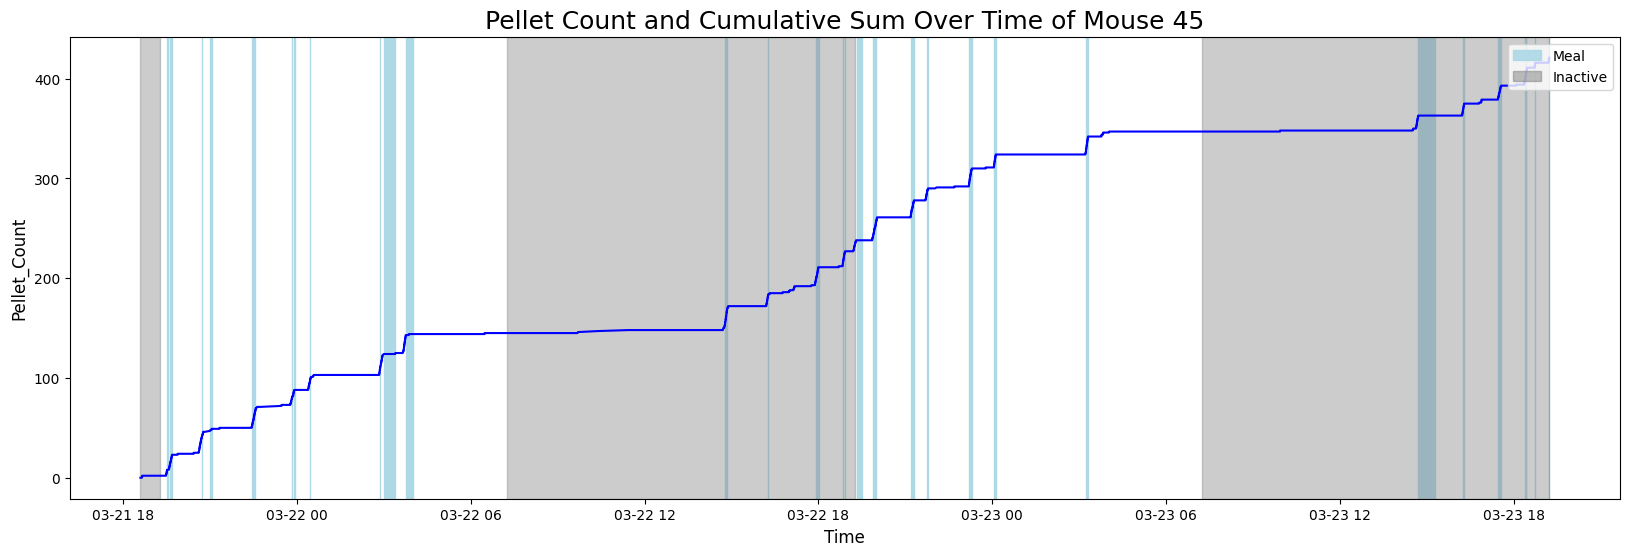

In [13]:
ctrl_avg_pellet = [] # pellet per hour
ctrl_dark_meals = [] # percentage of meals in inactive/dark phase
ctrl_fir_meal = []
ctrl_meal_count = []

for path in paths.reversal_ivsa_ctrl:
    # try:
        # print(path)
        data = read_csv_clean(path, remove_trivial=False, collect_time=True)
        # meal = ml.find_meals(data, pellet_count_threshold=pellet_count_threshold, 
        #                      collect_quantile=collect_quantile, pellet_quantile=pellet_quantile)
        meal, meal_pellet_cnt, meal_acc = ml.find_meals_paper(data, time_threshold=time_threshold, pellet_threshold=pellet_threshold)
        group = ml.pellet_flip(data)
        num = tl.get_bhv_num(path)[0]
        avg = round(len(meal) / ml.experiment_duration(data), 2)
        ctrl_meal_count.append(avg)
        ctrl_avg_pellet.append(ml.average_pellet(group))
        ctrl_dark_meals.append(ml.active_meal(meal))
        val_idx = next((i for i, x in enumerate(meal_acc) if x >= 70), -1) # find first meal that has >60% accuracy
        meal_1 = (meal[val_idx][0] - data['Time'][0]).total_seconds() / 60
        ctrl_fir_meal.append(meal_1)
        print(meal_acc[:5])
        ml.graph_pellet_frequency(group, None, num)
        ml.graphing_cum_count(data, meal, None, num, flip=True)
    # except:
    #     pass

[79.16666666666666, 57.14285714285714, 76.92307692307693, 80.0, 100.0]


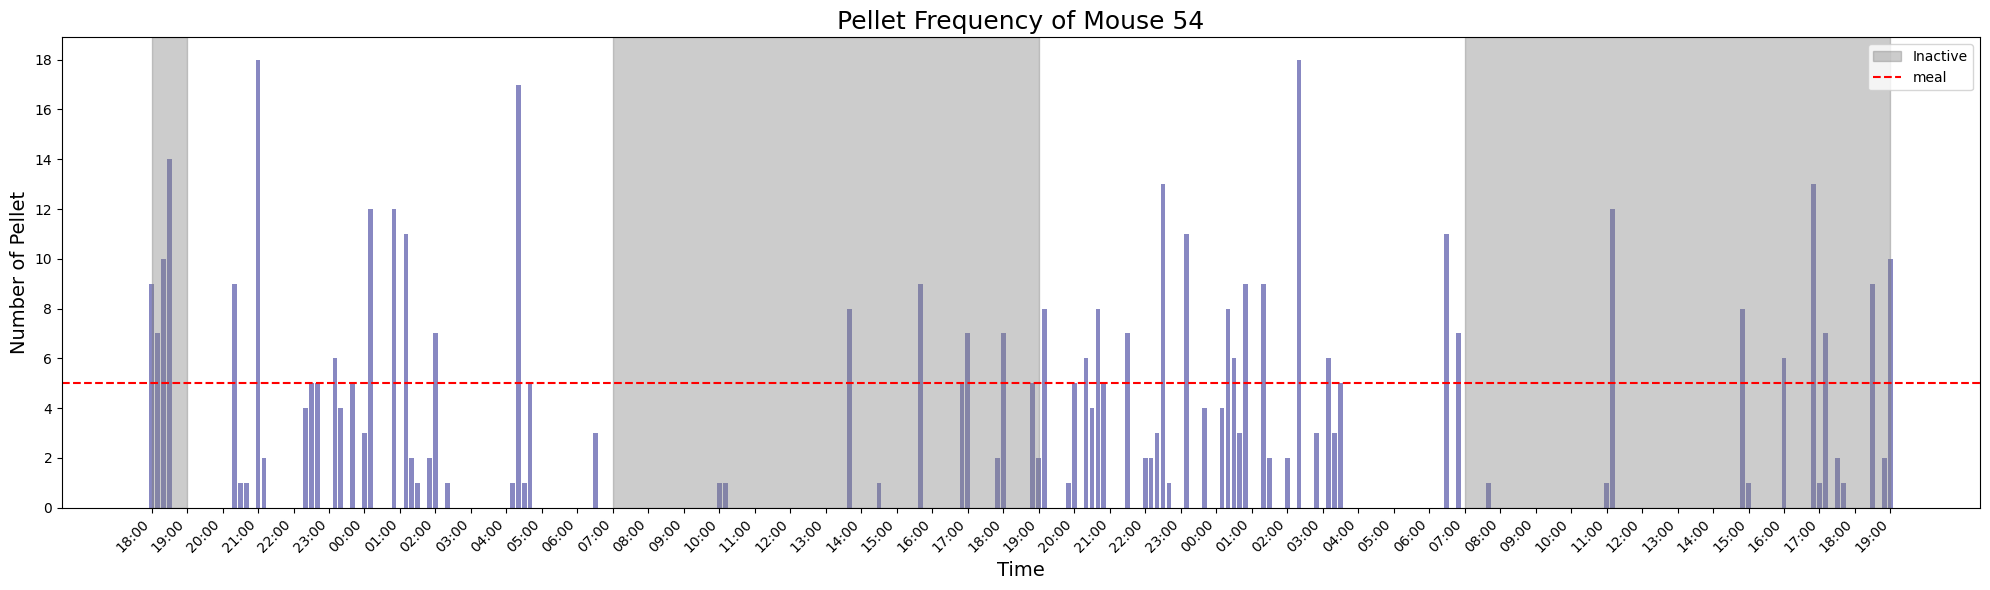

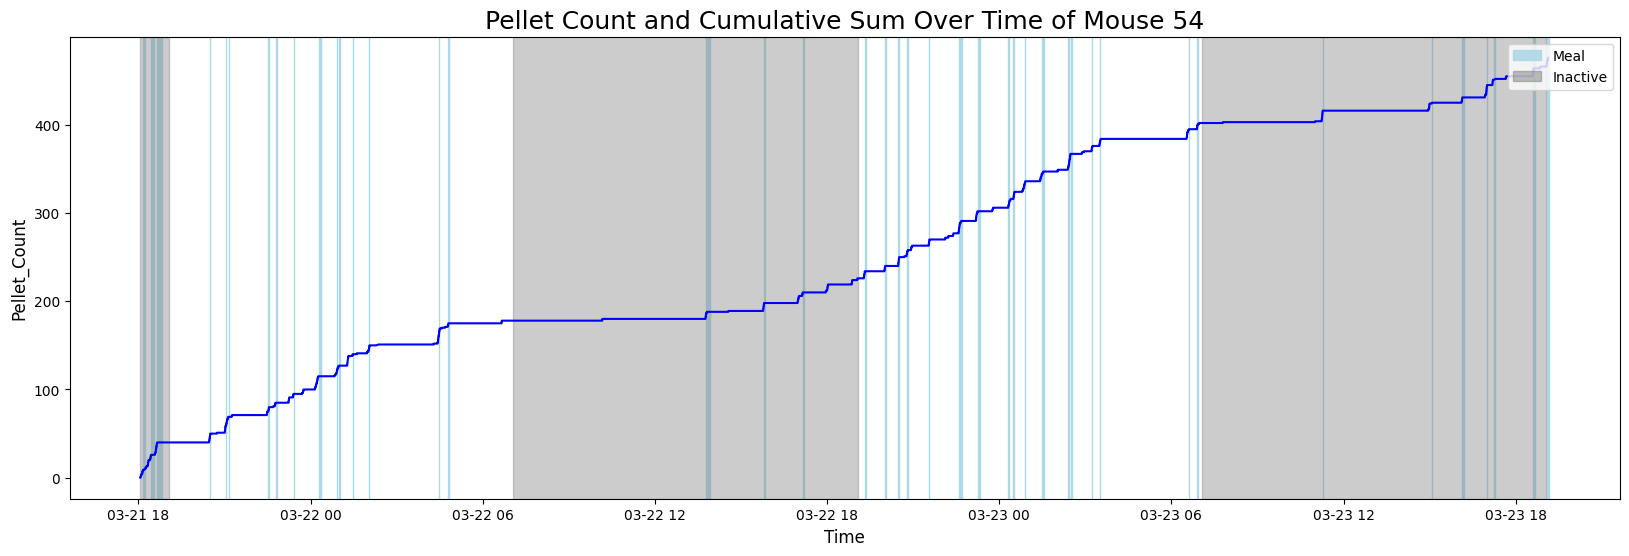

[21.052631578947366, 43.75, 84.61538461538461, 71.42857142857143, 100.0]


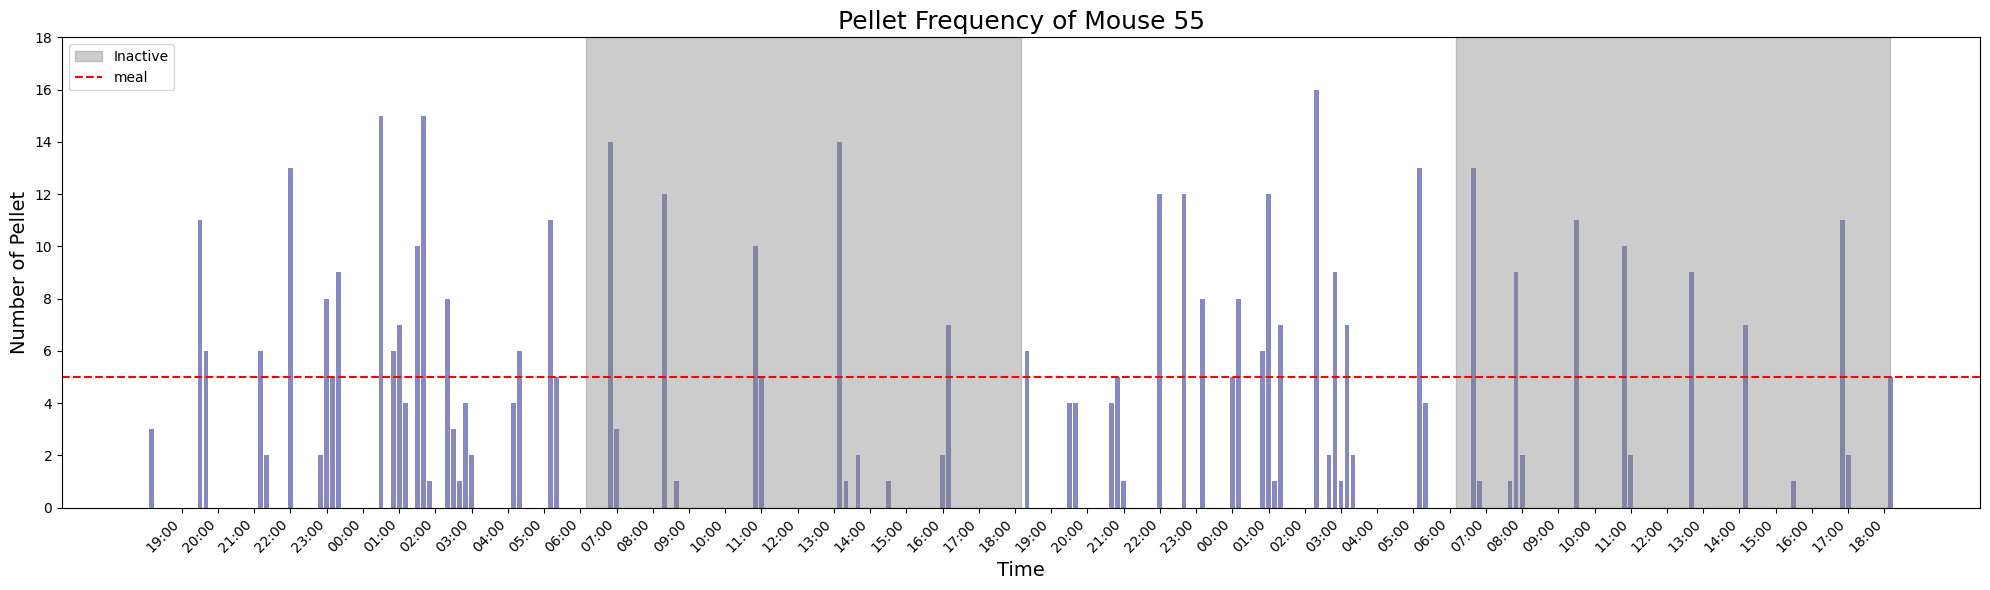

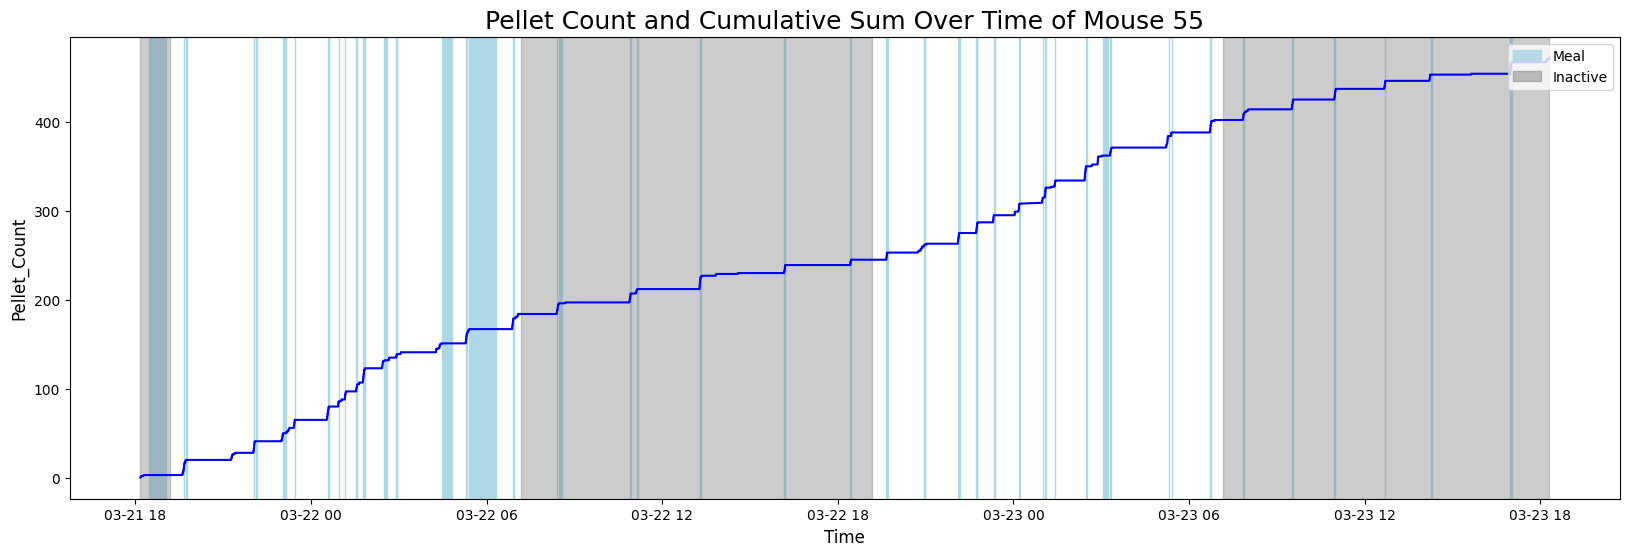

[85.71428571428571, 77.77777777777779, 38.46153846153847, 52.63157894736842, 62.5]


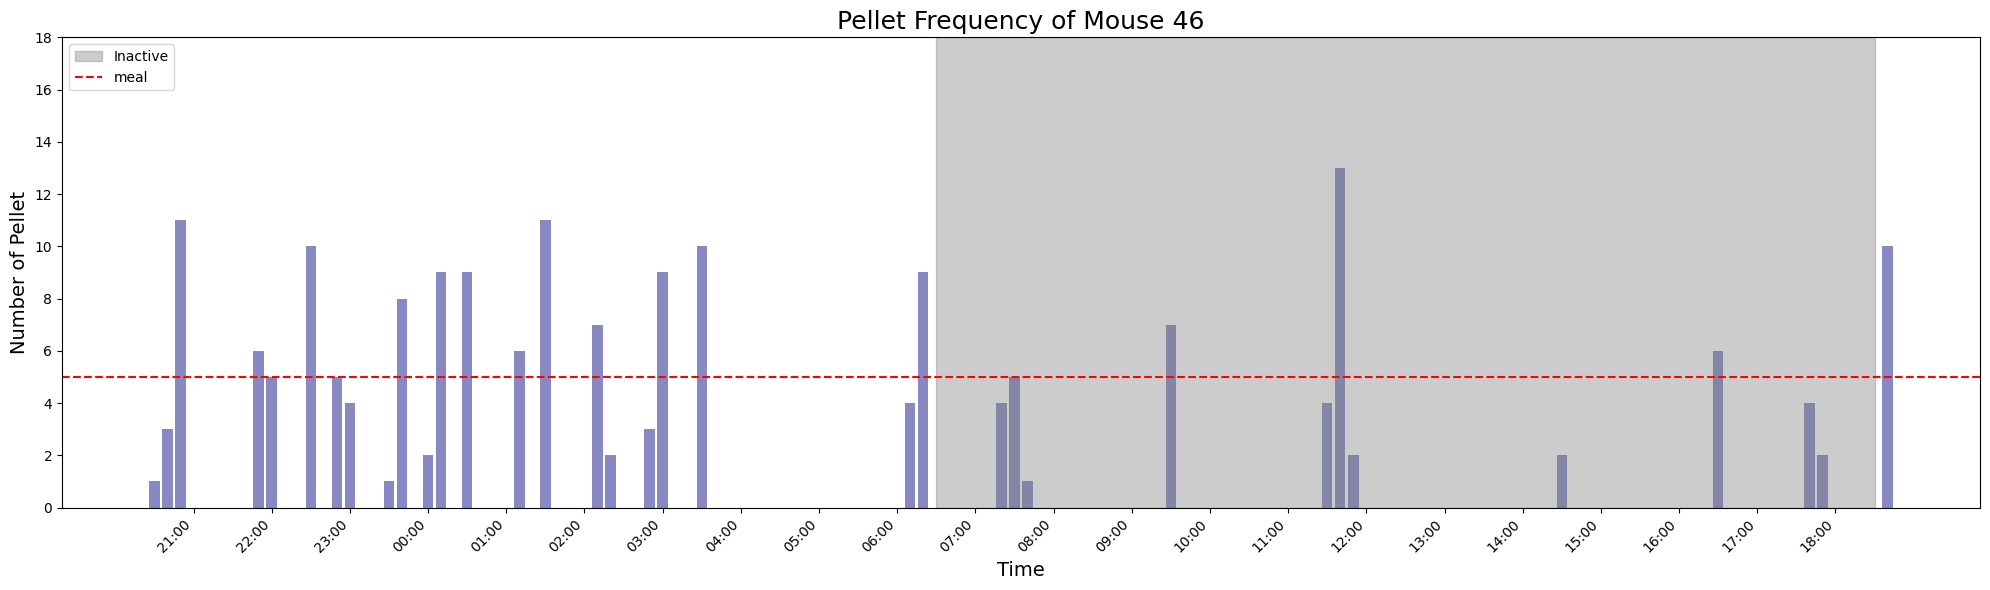

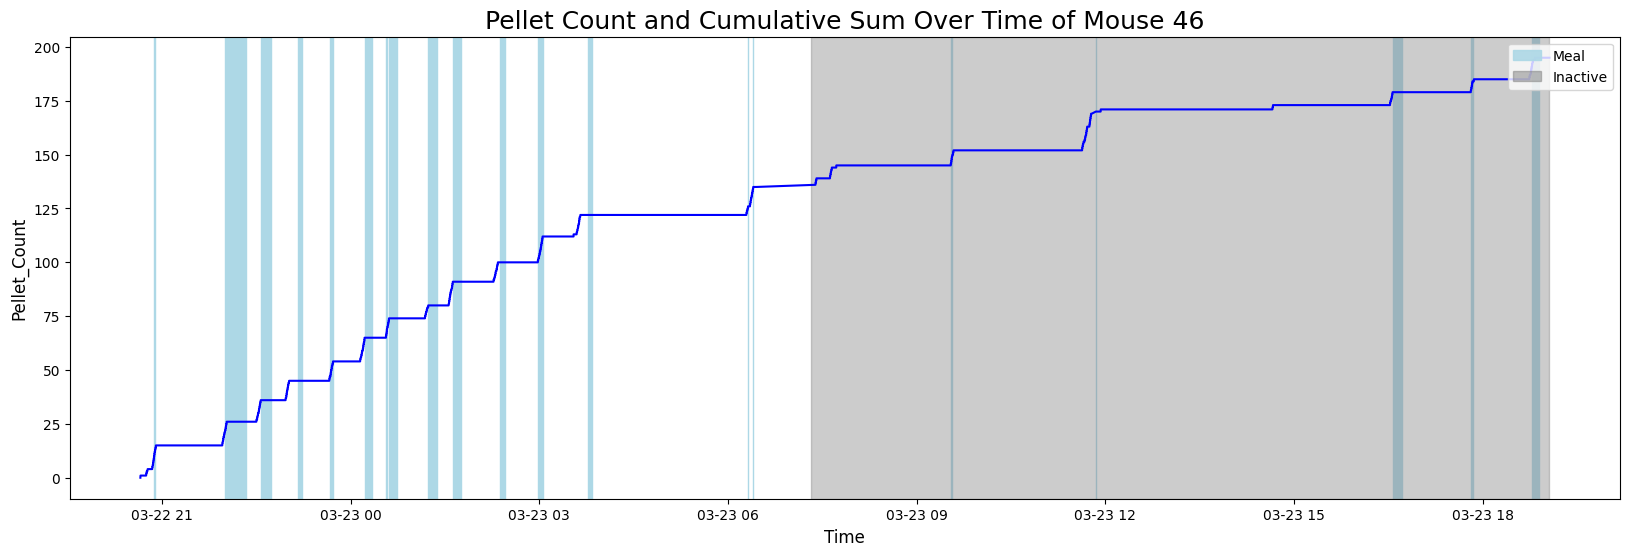

[75.0, 100.0, 52.307692307692314, 100.0, 43.75]


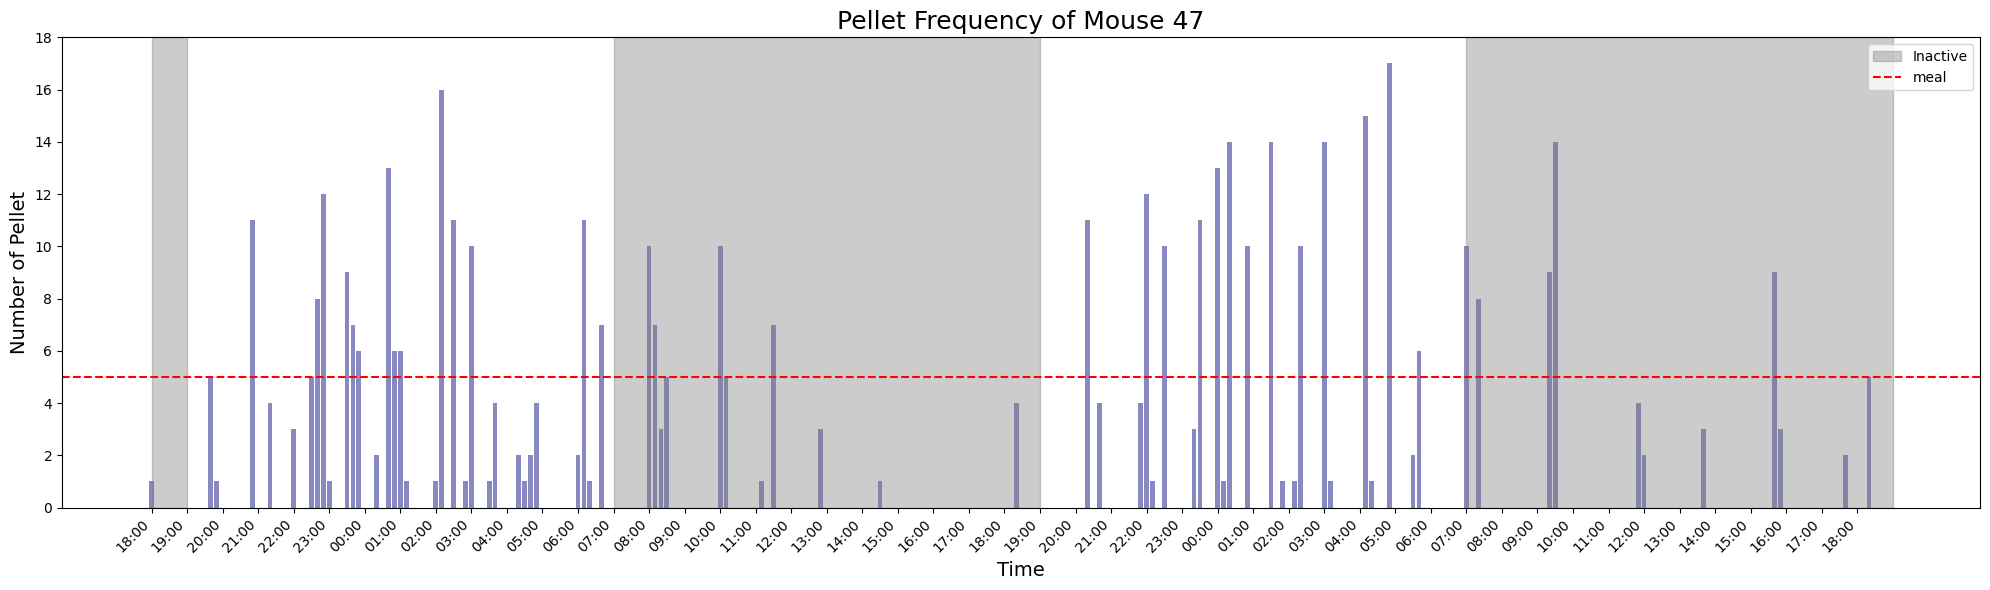

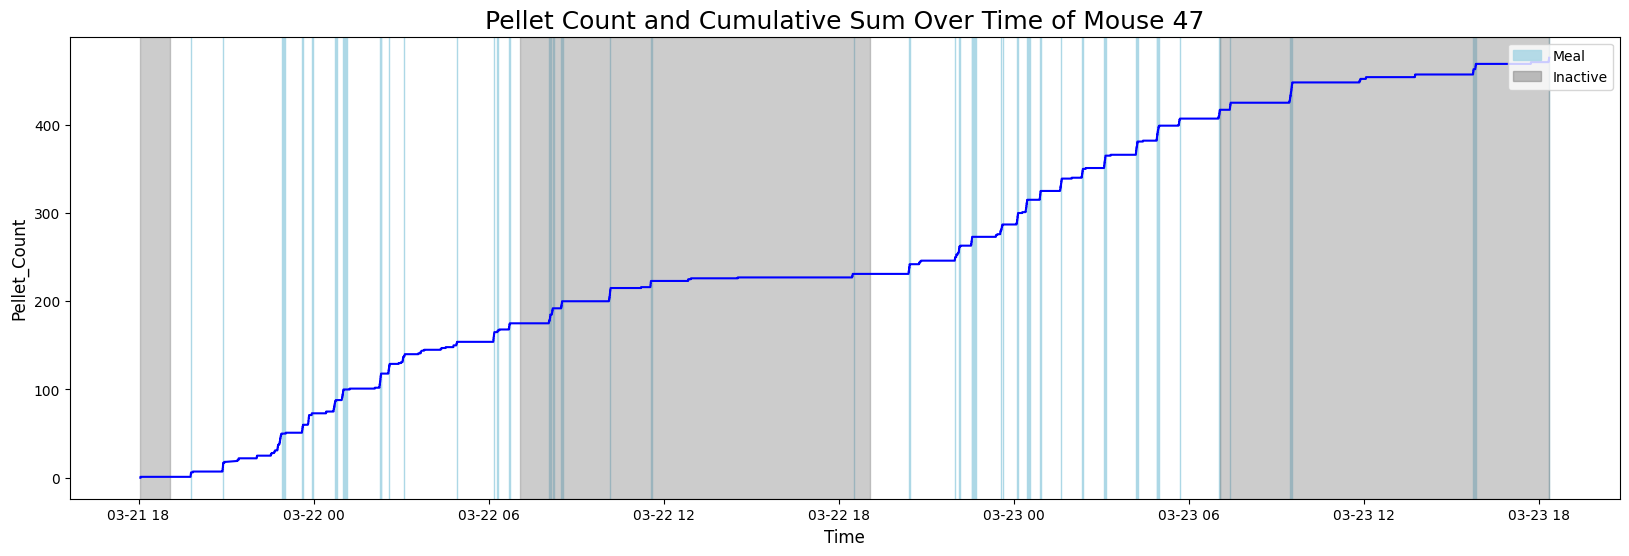

[100.0, 100.0, 20.0, 90.9090909090909, 100.0]


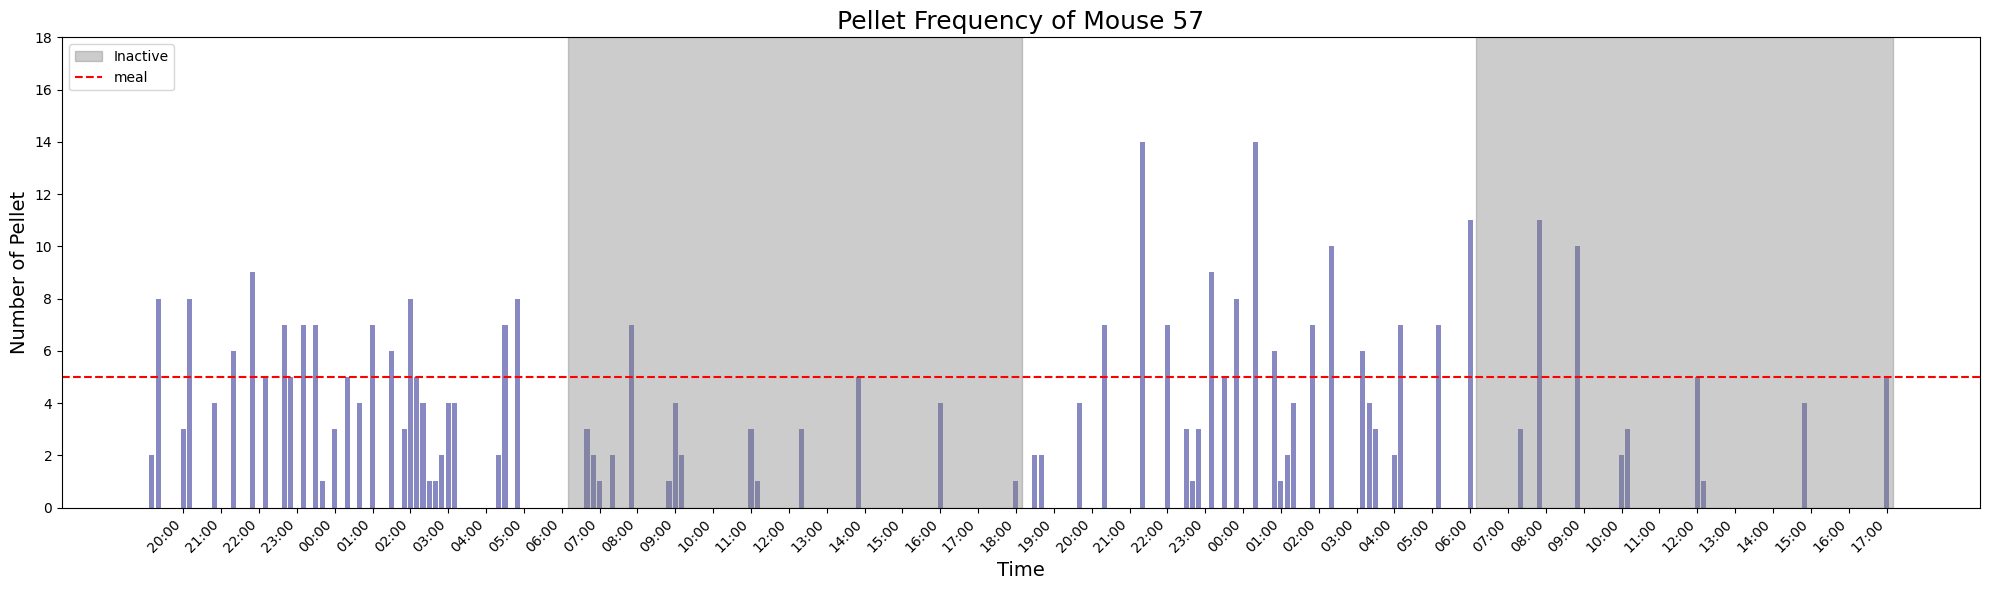

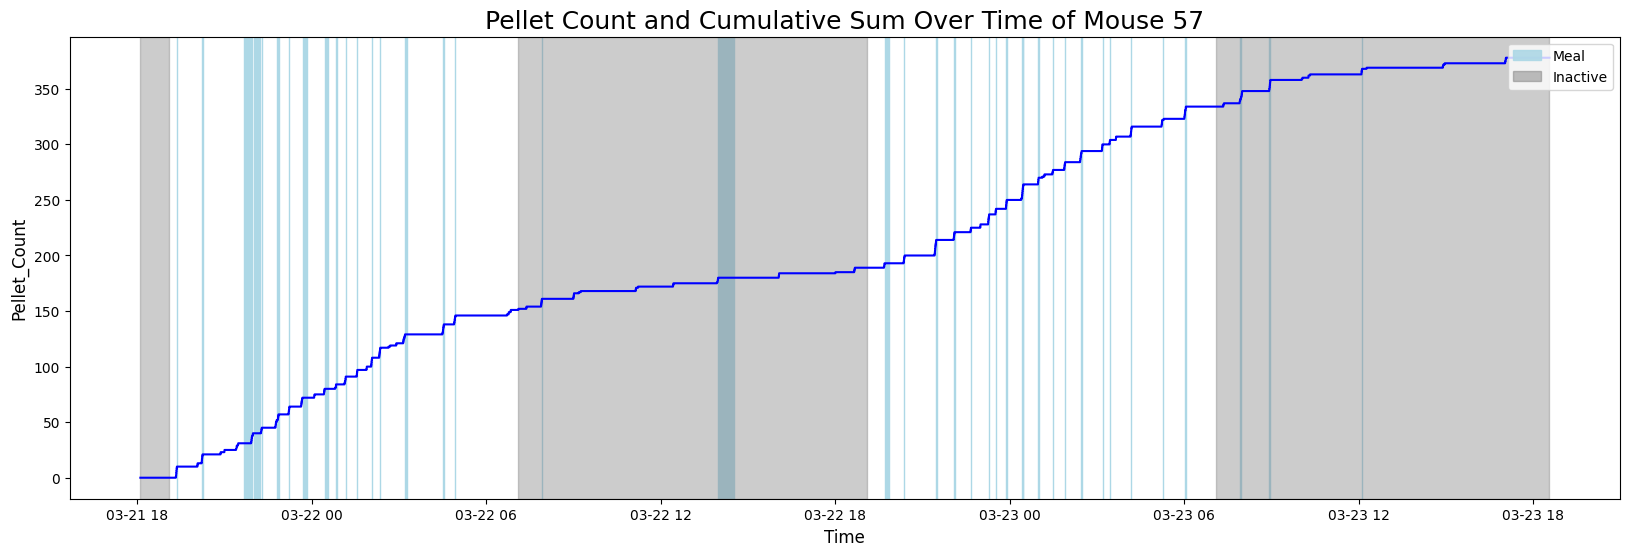

[47.28033472803347, 72.0, 64.28571428571429, 24.390243902439025, 69.56521739130434]


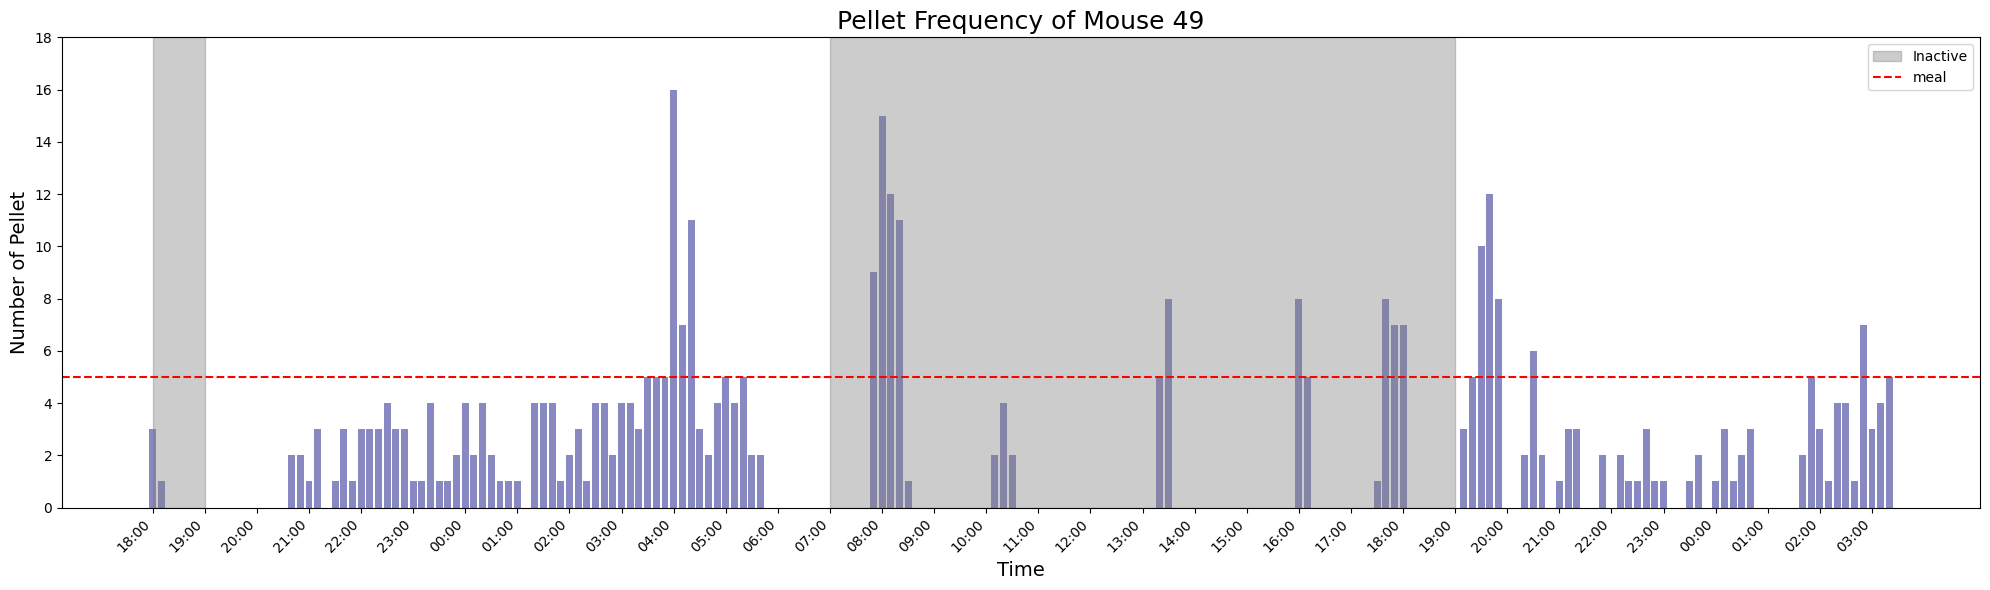

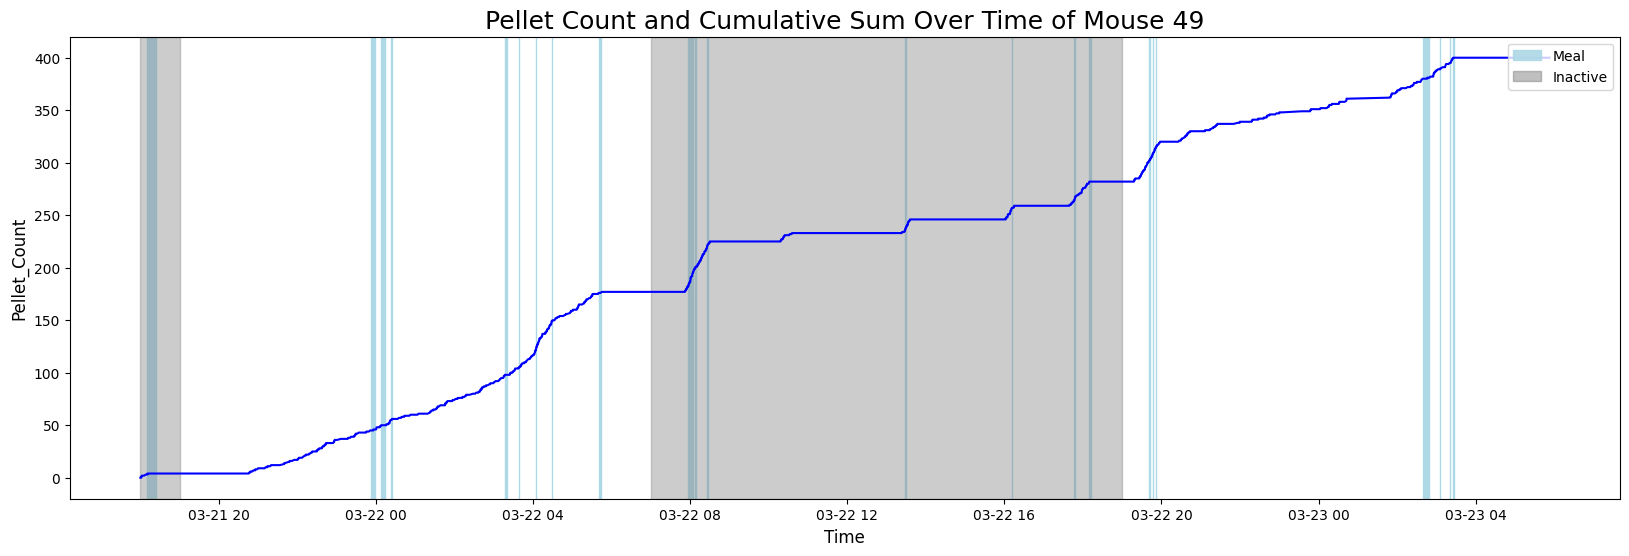

[73.91304347826086, 64.28571428571429, 28.125, 60.0, 90.0]


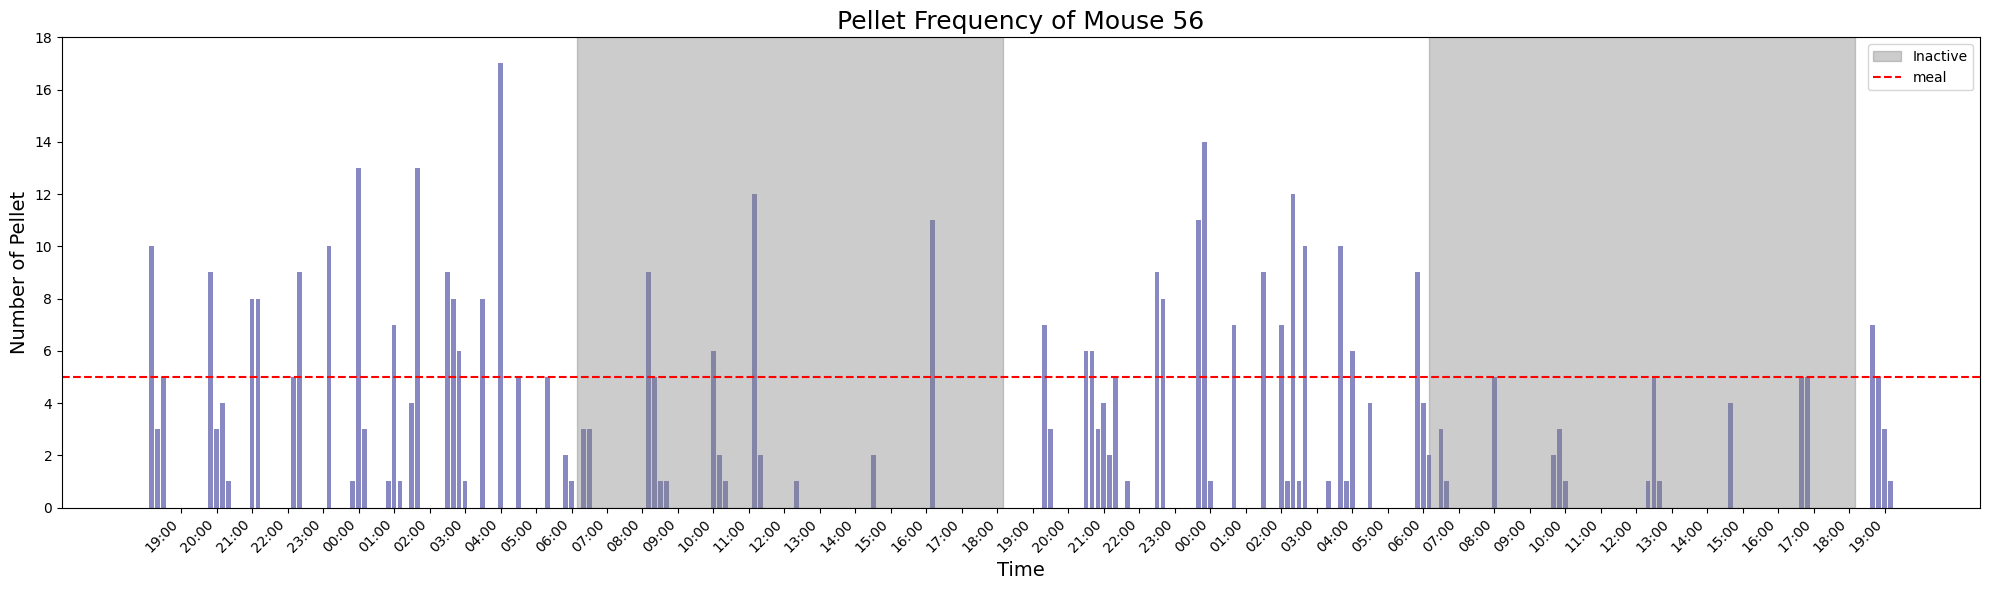

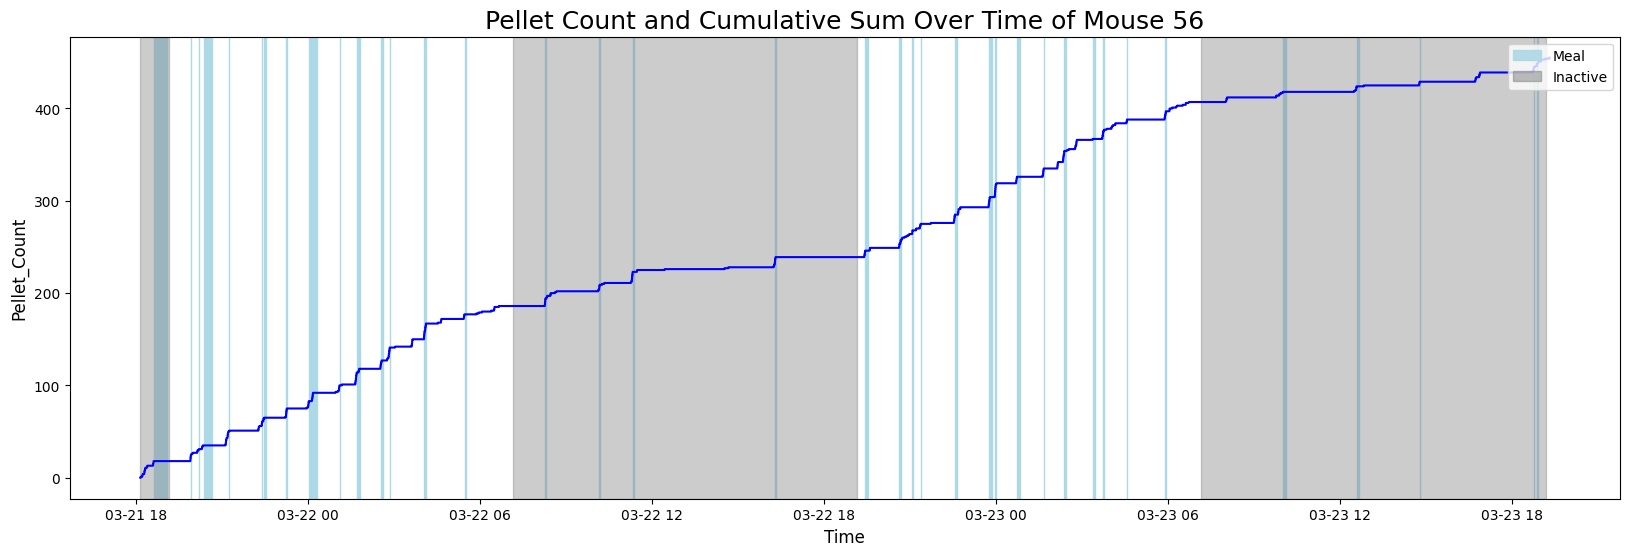

In [14]:
exp_avg_pellet = [] # pellet per hour
exp_dark_meals = [] # percentage of meals in inactive/dark phase
exp_fir_meal = []
exp_meal_count = []

for path in paths.reversal_ivsa_exp:
    # print(path)
    data = read_csv_clean(path, remove_trivial=False, collect_time=True)
    # meal = ml.find_meals(data, pellet_count_threshold=pellet_count_threshold, 
    #                      collect_quantile=collect_quantile, pellet_quantile=pellet_quantile)
    meal, meal_pellet_cnt, meal_acc = ml.find_meals_paper(data, time_threshold=time_threshold, pellet_threshold=pellet_threshold)
    group = ml.pellet_flip(data)
    num = tl.get_bhv_num(path)[0]           
    avg = round(len(meal) / ml.experiment_duration(data), 2)
    exp_meal_count.append(avg)
    exp_avg_pellet.append(ml.average_pellet(group))
    exp_dark_meals.append(ml.active_meal(meal))
    val_idx = next((i for i, x in enumerate(meal_acc) if x >= 70), -1) # find first meal that has >60% accuracy
    meal_1 = (meal[val_idx][0] - data['Time'][0]).total_seconds() / 60
    exp_fir_meal.append(meal_1)
    print(meal_acc[:5])
    ml.graph_pellet_frequency(group, None, num)
    ml.graphing_cum_count(data, meal, None, num, flip=True)

In [15]:
ctrl_avg_pellet, exp_avg_pellet

([6.628, 7.397, 7.966, 9.363, 8.959, 8.651],
 [9.714, 9.833, 8.797, 9.848, 8.247, 12.0, 9.286])

In [16]:
invs.perform_T_test(ctrl_dark_meals, exp_dark_meals)

P Value is  0.13683170624117452
There is no significant difference between the two groups.


In [17]:
ctrl_meal_count, exp_meal_count

([20.41, 20.2, 23.42, 25.89, 24.47, 22.21],
 [24.95, 28.41, 25.71, 27.83, 20.8, 16.73, 22.96])

#### Meal Count

In [18]:
invs.perform_T_test(ctrl_meal_count, exp_meal_count, test_side='greater')

P Value is  0.2787599474216431
There is no significant difference between the two groups.


#### Average Pellet

In [19]:
invs.perform_T_test(ctrl_avg_pellet, exp_avg_pellet, test_side='greater')

P Value is  0.016484671801691175
Experiment group is significantly greater than control group


Control Size: 6
PICA Size: 7
Control Average: 8.160666666666666
PICA Average: 9.674999999999999
Control Standard Deviation: 1.028933169193542
PICA Standard Deviation: 1.1848648305467873


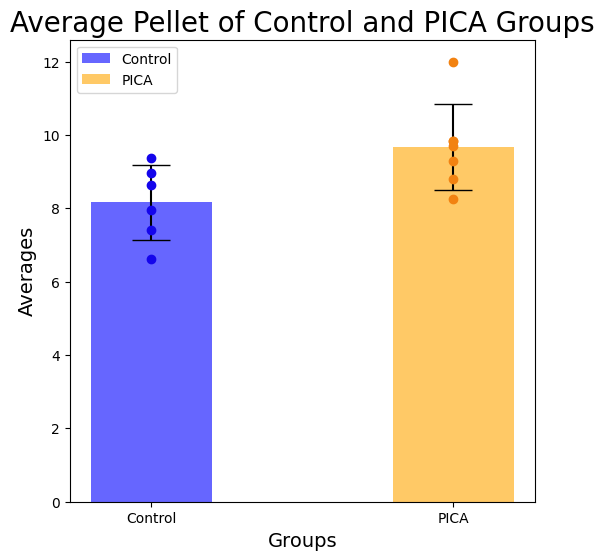

In [20]:
ml.graph_group_stats(ctrl_avg_pellet, exp_avg_pellet, stats_name='Average Pellet', exp_name='PICA')

#### First Meal Time

In [21]:
invs.perform_T_test(ctrl_fir_meal, exp_fir_meal)

P Value is  0.7706321759498612
There is no significant difference between the two groups.


Control Size: 6
PICA Size: 7
Control Average: 119.625
PICA Average: 101.32333333333334
Control Standard Deviation: 97.14711674683002
PICA Standard Deviation: 119.79409323532643


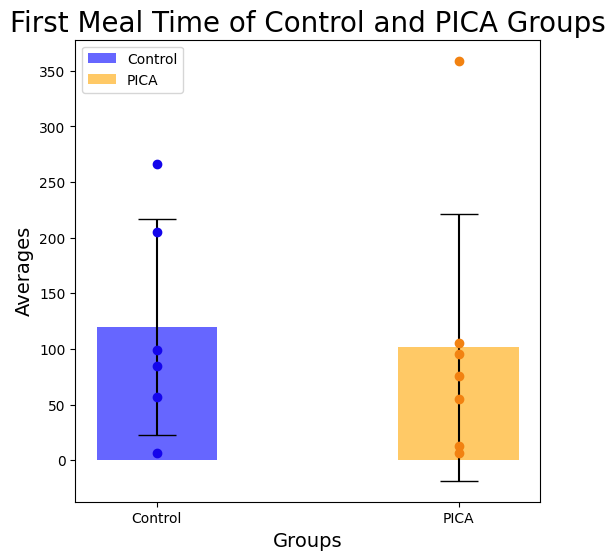

In [22]:
ml.graph_group_stats(ctrl_fir_meal, exp_fir_meal, stats_name='First Meal Time', exp_name='PICA')

In [ ]:
invs.perform_T_test(ctrl)